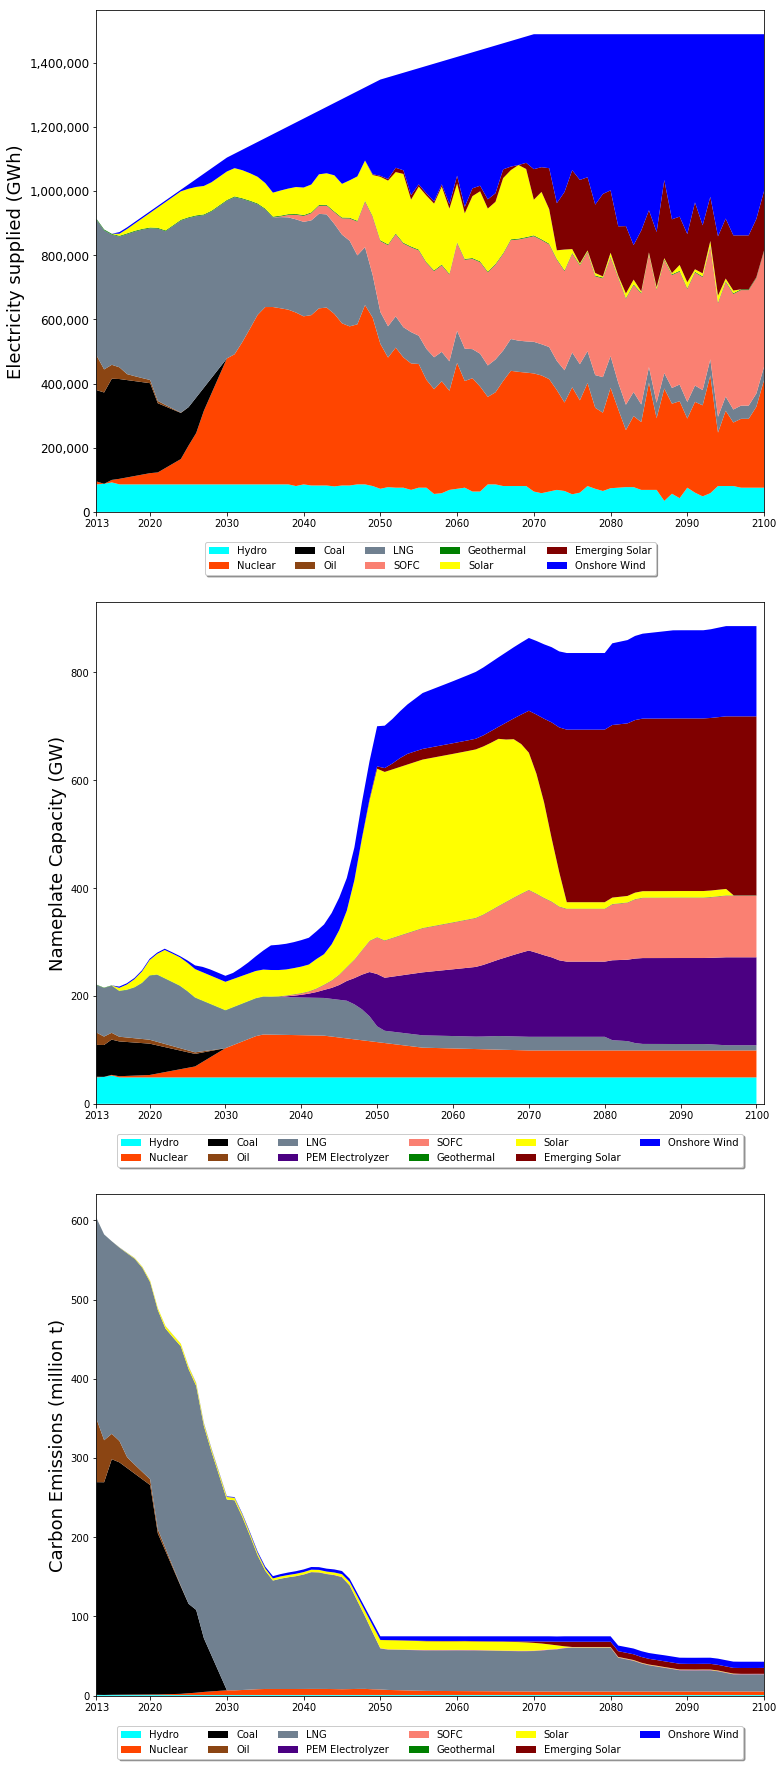

In [54]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import OrderedDict 
%matplotlib inline

fname='elc_output.csv'
colfilter = ['Process','Period','PV']
xlocs = [2013]
xlocs=xlocs+list(np.arange(2020,2101,10))
a = pd.read_csv(fname, delimiter=';', usecols = colfilter)
a = a[colfilter]
a=a.groupby(['Process', 'Period']).sum() #sum values for same period, process
a=a.reset_index()
a.set_index('Period', inplace=True)

procs = a.Process.unique()
newyrs=pd.Series(range(2013,2101))
pltdict=OrderedDict()

for prc in procs:
    b=a.loc[a['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict[prc]=b['PV']
#print(procs)

ordlegend=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'SOFC',#'CCS-Gas',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind'#,'Offshore Fixed',#,'Offshore Floating',
           #'Li-ion'
          ]
colours = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'salmon',#'tan',
           'green','yellow','maroon',
           'blue'#,'dodgerblue',#,'teal',
          #'violet'
          ]
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10, 24))
fig.tight_layout() 
fig.subplots_adjust(hspace=0.18)
pltyrs=range(2013,2101)
ax1.stackplot(pltyrs,  pltdict['FTE-DIMEHYD13'],pltdict['FTE-DIMEONUC13']+pltdict['FTE-DIMENUC27'],
             pltdict['ELCTECOA'],pltdict['ELCTEOIL'], pltdict['ELCTELNG']+pltdict['FTE-DIMECC17'],
              pltdict['SOFC30'], #pltdict['FTE-DIMECCSG22'],
             pltdict['ELCTEGEO'],
           pltdict['ELCTEPVS']+pltdict['FTE-DIMEPVN17'],pltdict['FTE-DIMESOL17'],
               pltdict['ELCTEWND']+pltdict['FTE-DIMEWON17'],#pltdict['FTE-DIMEWOFX17'],#pltdict['FTE-DIMEWOFL19'],
              #pltdict['FTE-ELCSTG17'],
             labels=ordlegend, colors=colours)
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=12)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.set_xlim((2013, 2100))
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=5)
#ax1.set_xlabel('Years',fontsize='18')
ax1.set_ylabel('Electricity supplied (GWh)',fontsize='18')
ax1.set_xticks(ticks=xlocs)

fname='co2_emi_sources.csv'
colfilter = ['Process','Period','PV']

cdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
cdf = cdf[colfilter]
cdf=cdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
cdf=cdf.reset_index()
cdf.set_index('Period', inplace=True)

procs2 = cdf.Process.unique()
pltdict2={}

for prc in procs2:
    c=cdf.loc[cdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict2[prc]=c['PV']
#print(procs2)

fname='net_cap.csv'
colfilter = ['Process','Period','PV']

capdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
capdf = capdf[colfilter]
capdf=capdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
capdf=capdf.reset_index()
capdf.set_index('Period', inplace=True)

procs3 = capdf.Process.unique()
pltdict4={}

for prc in procs3:
    c=capdf.loc[capdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=c['PV']
#print(procs3)

ordlegend2=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'PEM Electrolyzer','SOFC',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind'
          ]
           
colours2 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'indigo','salmon',
           'green','yellow','maroon',
           'blue'
          ]
          
pltyrs2=range(2013,2101)
l2 = ax2.stackplot(pltyrs2, pltdict4['ELCTEHYD'],pltdict4['ELCTENUC']+pltdict4['NEWNUC27'],
             pltdict4['ELCTECOA'],pltdict4['ELCTEOIL'], pltdict4['ELCTELNG']+pltdict4['ELCCC17'],
             pltdict4['ECPEM22'],pltdict4['SOFC30'],
           pltdict4['ELCTEGEO'],
           pltdict4['ELCTEPVS']+pltdict4['ELCPVN17'],pltdict4['EMSOL17'],
               pltdict4['ELCTEWND']+pltdict4['ELCWON17'],
             labels=ordlegend2, colors=colours2)
ax2.set_xlim((2013, 2101))
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
ax2.set_ylabel('Nameplate Capacity (GW)',fontsize='18')
ax2.set_xticks(ticks=xlocs)

ordlegend3=['Hydro','Nuclear',
           'Coal','Oil', 'LNG',
           'PEM Electrolyzer','SOFC',
           'Geothermal','Solar','Emerging Solar',
           'Onshore Wind'
          ]
colours3 = ['aqua','orangered',
           'black', 'saddlebrown', 'slategray',
           'indigo','salmon',
           'green','yellow','maroon',
           'blue'
          ]
pltyrs3=range(2013,2101)
ax3.stackplot(pltyrs3, pltdict2['ELCTEHYD'],pltdict2['ELCTENUC']+pltdict2['NEWNUC27'],
             pltdict2['ELCTECOA'],pltdict2['ELCTEOIL'], pltdict2['ELCTELNG']+pltdict2['ELCCC17'],
              pltdict2['FTE-EPEMH22'],pltdict2['SOFC30'],
             pltdict2['ELCTEGEO'],
           pltdict2['ELCTEPVS']+pltdict2['ELCPVN17'],pltdict2['EMSOL17'],
               pltdict2['ELCTEWND']+pltdict2['ELCWON17'],
             labels=ordlegend3, colors=colours3)
ax3.set_xlim((2013, 2100))
ax3.set_ylabel('Carbon Emissions (million t)',fontsize='18')
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
ax3.set_xticks(ticks=xlocs)

fig.savefig('newtechs_nuc.png',bbox_inches='tight', dpi=300)

In [44]:
fname='selc_sources.csv'
colfilter = ['Process','Period','PV']

sdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
sdf = sdf[colfilter]
sdf=sdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
sdf=sdf.reset_index()
sdf.set_index('Period', inplace=True)

procs4 = sdf.Process.unique()
pltdict4={}
stgperc={}
stgsum=0

for prc in procs4:
    s=sdf.loc[sdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict4[prc]=s['PV']
    stgsum+=(pltdict4[prc].sum())    

print('Total storage electricity:',stgsum)
for prc in procs4:
    stgperc[prc]=(pltdict4[prc].sum())/stgsum
    print('Process:',prc)
    print('Percentage:',stgperc[prc]*100)

Total storage electricity: 29733489.646427125
Process: FTE-SIMECC17
Percentage: 1.4608879034788544
Process: FTE-SIMEHYD17
Percentage: 2.880227434577915
Process: FTE-SIMENUC27
Percentage: 13.367098190041018
Process: FTE-SIMEONUC17
Percentage: 0.6438748770647388
Process: FTE-SIMEPVN17
Percentage: 26.17929358409376
Process: FTE-SIMESOL17
Percentage: 35.754970684981465
Process: FTE-SIMEWON17
Percentage: 19.713647325762246


In [45]:
fname='h2_sources.csv'
colfilter = ['Process','Period','PV']

hdf = pd.read_csv(fname, delimiter=';', usecols = colfilter)
hdf = hdf[colfilter]
hdf=hdf.groupby(['Process', 'Period']).sum() #sum values for same period, process
hdf=hdf.reset_index()
hdf.set_index('Period', inplace=True)

procs5 = hdf.Process.unique()
pltdict5={}
h2perc={}
h2sum=0

for prc in procs5:
    h=hdf.loc[hdf['Process'] == prc].reindex(newyrs,fill_value=0)
    pltdict5[prc]=h['PV']
    h2sum+=(pltdict5[prc].sum())  

print('Total H2:',h2sum)
for prc in procs5:
    h2perc[prc]=(pltdict5[prc].sum())/h2sum
    print('Process:',prc)
    print('Percentage:',h2perc[prc]*100)


'\nordlegend4=[\'Hydro\',\'Nuclear\',\n            \'LNG\',\n           \'Solar\',\'Emerging Solar\',\n           \'Onshore Wind\'\n          ]\ncolours4 = [\'aqua\',\'orangered\',\n           \'slategray\',\n           \'yellow\',\'maroon\',\n           \'blue\'\n          ]\npltyrs4=range(2013,2101)\nax4.stackplot(pltyrs4, pltdict4[\'FTE-SIMEHYD17\'],pltdict4[\'FTE-SIMEONUC17\']+pltdict4[\'FTE-SIMENUC27\'],\n             pltdict4[\'FTE-SIMECC17\'],\n           pltdict4[\'FTE-SIMEPVN17\'],pltdict4[\'FTE-SIMESOL17\'],\n               pltdict4[\'FTE-SIMEWON17\'],\n             labels=ordlegend4, colors=colours4)\nax4.set_xlim((2013, 2100))\nax4.set_ylabel(\'Electricity diverted to storage (GWh)\',fontsize=\'18\')\nax4.legend(loc=\'upper center\', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)\nax4.set_xticks(ticks=xlocs)\nax4.tick_params(axis="x", labelsize=10)\nax4.tick_params(axis="y", labelsize=12)\nax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: f

In [46]:
'''
ordlegend4=['Hydro','Nuclear',
            'LNG',
           'Solar','Emerging Solar',
           'Onshore Wind'
          ]
colours4 = ['aqua','orangered',
           'slategray',
           'yellow','maroon',
           'blue'
          ]
pltyrs4=range(2013,2101)
ax4.stackplot(pltyrs4, pltdict4['FTE-SIMEHYD17'],pltdict4['FTE-SIMEONUC17']+pltdict4['FTE-SIMENUC27'],
             pltdict4['FTE-SIMECC17'],
           pltdict4['FTE-SIMEPVN17'],pltdict4['FTE-SIMESOL17'],
               pltdict4['FTE-SIMEWON17'],
             labels=ordlegend4, colors=colours4)
ax4.set_xlim((2013, 2100))
ax4.set_ylabel('Electricity diverted to storage (GWh)',fontsize='18')
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
ax4.set_xticks(ticks=xlocs)
ax4.tick_params(axis="x", labelsize=10)
ax4.tick_params(axis="y", labelsize=12)
ax4.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ordlegend5=['PEM Electrolyzer']
colours5 = ['indigo']
pltyrs5=range(2013,2101)
ax5.stackplot(pltyrs5,
             pltdict5['FTE-EPEMH22'],
                       labels=ordlegend5, colors=colours5)
ax5.set_xlim((2013, 2100))
ax5.set_ylabel('Hydrogen Sources (GWh)',fontsize='18')
ax5.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=1)
ax5.set_xticks(ticks=xlocs)
ax5.tick_params(axis="x", labelsize=10)
ax5.tick_params(axis="y", labelsize=12)
ax5.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
'''

Total H2: 24264064.48228824
Process: FTE-EPEMH22
Percentage: 100.0
